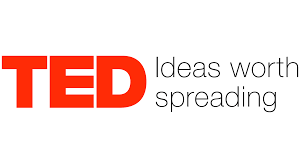
# Introduction
## About TED
**TED**, originally founded in 1984 as a conference at the intersection of **Technology, Entertainment, and Design**, has evolved into a global non-profit organization dedicated to disseminating ideas. Over the years, TED has significantly expanded its scope to encompass a wide range of subjects, covering everything from science and business to global issues, and now offers content in over 100 languages. This expansion reflects TED's mission to share knowledge and insights across diverse fields and cultures.

## Data Scraping and Usage
- **Source**: The dataset analyzed in this notebook comprises **more than 6000 talks data** collected from the TED website as of **February 12, 2024**.
- **Purpose**: The scraping was conducted for study purposes.
- **Compliance**: This data scraping adheres to the terms of use of the TED website and respects copyright and intellectual property rights.
- **License**: The data is used under fair use for academic and non-commercial research purposes.

**Data Features:**

- **id**: A unique numerical id for each TED Talk.
- **date**: The date when the talk was given.
- **view**: The total number of views each talk has received so far.
- **length**: The duration (seconds) of the talk.
- **speaker**: The name of the speaker.
- **title**: The title of the TED Talk.
- **tag**: The topics associated with the talk.
- **url**: The link to access the talk from ted.com.
- **context**: Event information about the talk.
- **description**: A short description of the talk.

## Questions
* What is the frequency of TED Talks changed over the years?
* How has the monthly popularity of TED Talks evolved year by year?
* What are the most viewed TED Talks and common tags among them?
* Who are the most popular TED Talk speakers and what are common tags among them?
* What are the most frequent words in title?

## Assumptions
* The popularity and frequency of TED Talks have increased over the years due to the growing global reach of digital media.
* There are seasonal trends in TED Talk viewership, possibly influenced by holiday.
* Talks on certain topics (like technology or business) are more popular than others.
* More recent talks are likely to have more views due to the growing popularity of online content.
* Popular or trending subjects, such as technology, health, environment, or personal development, are likely to show most frequent in title. 

# Data Analysis Steps 
- Step 1: Data Cleaning
- Step 2: Exploratory Data Analysis (EDA)
- Step 3: Conclusion

## Step 1: Data Cleaning
**Objective**: Prepare the dataset for accurate and meaningful analysis.

- Identifying and Handling Missing Values.
- Data Type Consistency.
- Outlier Detection and Treatment.

Let's start cleaning!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk

from collections import Counter
from nltk.corpus import stopwords

# Read csv
df = pd.read_csv("ted_talks.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6268 entries, 0 to 6267
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           6268 non-null   int64  
 1   date         6083 non-null   object 
 2   view         5935 non-null   object 
 3   length       6268 non-null   float64
 4   speaker      6267 non-null   object 
 5   title        6268 non-null   object 
 6   tag          6086 non-null   object 
 7   url          6268 non-null   object 
 8   context      6084 non-null   object 
 9   description  6086 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 489.8+ KB


- The TED Talks dataset comprises 10 columns and 6268 entries, mixing numerical and categorical data. 
- 'date' and 'view' are in string **formats**, requiring conversion to date and numeric types respectively.
- The dataset presents some **missing values** in columns like **'date', 'view', 'speaker', 'tag', 'context', and 'description'**, necessitating careful data cleaning. 

In [2]:
df.head()

,id,date,view,length,speaker,title,tag,url,context,description
0,518806,October 2023,"15,689",389.598,The Merian Ensemble,"""Atalanta""","entertainment, music, performance, entertainme...",https://www.ted.com/talks/the_merian_ensemble_...,TEDWomen 2023,Chamber music group The Merian Ensemble deligh...
1,519572,April 2019,"104,401",701.000,Kirsten Banks,The aboriginal knowledge stored in the stars,"culture, science, astronomy, space, ancient wo...",https://www.ted.com/talks/kirsten_banks_the_ab...,TEDxYouth@Sydney,How many stars can you see at night? If you’re...
2,509278,February 2024,"121,937",297.631,Vikramāditya Prakāsh,Is Chandigarh a perfectly planned city?,"Read more about TED-Ed., Read more about TED-E...",https://www.ted.com/talks/vikramaditya_prakash...,TED-Ed,"In 1947, India achieved independence from Brit..."
3,516513,July 2023,"298,580",618.368,Jonathan Foley,The climate solutions worth funding — now,"climate change, environment, science, sustaina...",https://www.ted.com/talks/jonathan_foley_the_c...,TED Countdown Summit,"When it comes to climate solutions, ""now is be..."
4,518592,April 2023,"328,518",916.000,John Mullins,6 tips on being a successful entrepreneur,"business, entrepreneur, success, personal grow...",https://www.ted.com/talks/john_mullins_6_tips_...,TEDxLondonBusinessSchool,"Sometimes, you need to break the rules to inno..."


- Unwanted tags such as "Read more about TED-Ed." require removing.

### Handle missing values and duplicates

In [3]:
# Check duplicates
print(f"Duplicated data:  {df.duplicated().sum()}")

# Count the number of empty values in the data
print("Empty values: ")
df.isna().sum()

Duplicated data:  0
Empty values: 


id               0
date           185
view           333
length           0
speaker          1
title            0
tag            182
url              0
context        184
description    182
dtype: int64

In [4]:
# Drop empty values and rename the dataframe as 'df1'
df1 = df.dropna()
df1.isna().sum()

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5930 entries, 0 to 6267
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5930 non-null   int64  
 1   date         5930 non-null   object 
 2   view         5930 non-null   object 
 3   length       5930 non-null   float64
 4   speaker      5930 non-null   object 
 5   title        5930 non-null   object 
 6   tag          5930 non-null   object 
 7   url          5930 non-null   object 
 8   context      5930 non-null   object 
 9   description  5930 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 509.6+ KB


### Convert data type of 'date' and 'view' 

In [5]:
# Remove commas from 'view' and convert to integers
df1['view'] = df1['view'].astype(str).str.replace(',', '').astype(int)

df1['view'].head()

C:\Users\78627\AppData\Local\Temp\ipykernel_16508\3879281595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['view'] = df1['view'].astype(str).str.replace(',', '').astype(int)


0     15689
1    104401
2    121937
3    298580
4    328518
Name: view, dtype: int32

In [6]:
# Create a copy of the DataFrame slice to ensure it's not just a view
df1 = df1.copy()

# Splitting the 'date' column into 'month' and 'year'
df1.loc[:, 'month'] = df1['date'].apply(lambda x: pd.to_datetime(x).month)
df1.loc[:, 'year'] = df1['date'].apply(lambda x: pd.to_datetime(x).year)

df1.head()

,id,date,view,length,speaker,title,tag,url,context,description,month,year
0,518806,October 2023,15689,389.598,The Merian Ensemble,"""Atalanta""","entertainment, music, performance, entertainme...",https://www.ted.com/talks/the_merian_ensemble_...,TEDWomen 2023,Chamber music group The Merian Ensemble deligh...,10,2023
1,519572,April 2019,104401,701.000,Kirsten Banks,The aboriginal knowledge stored in the stars,"culture, science, astronomy, space, ancient wo...",https://www.ted.com/talks/kirsten_banks_the_ab...,TEDxYouth@Sydney,How many stars can you see at night? If you’re...,4,2019
2,509278,February 2024,121937,297.631,Vikramāditya Prakāsh,Is Chandigarh a perfectly planned city?,"Read more about TED-Ed., Read more about TED-E...",https://www.ted.com/talks/vikramaditya_prakash...,TED-Ed,"In 1947, India achieved independence from Brit...",2,2024
3,516513,July 2023,298580,618.368,Jonathan Foley,The climate solutions worth funding — now,"climate change, environment, science, sustaina...",https://www.ted.com/talks/jonathan_foley_the_c...,TED Countdown Summit,"When it comes to climate solutions, ""now is be...",7,2023
4,518592,April 2023,328518,916.000,John Mullins,6 tips on being a successful entrepreneur,"business, entrepreneur, success, personal grow...",https://www.ted.com/talks/john_mullins_6_tips_...,TEDxLondonBusinessSchool,"Sometimes, you need to break the rules to inno...",4,2023


### Convert 'length' from seconds to minutes

In [7]:
# Convert length from seconds to minutes
df1['duration'] = (df1['length'] / 60).astype(int)

df1.head()

,id,date,view,length,speaker,title,tag,url,context,description,month,year,duration
0,518806,October 2023,15689,389.598,The Merian Ensemble,"""Atalanta""","entertainment, music, performance, entertainme...",https://www.ted.com/talks/the_merian_ensemble_...,TEDWomen 2023,Chamber music group The Merian Ensemble deligh...,10,2023,6
1,519572,April 2019,104401,701.000,Kirsten Banks,The aboriginal knowledge stored in the stars,"culture, science, astronomy, space, ancient wo...",https://www.ted.com/talks/kirsten_banks_the_ab...,TEDxYouth@Sydney,How many stars can you see at night? If you’re...,4,2019,11
2,509278,February 2024,121937,297.631,Vikramāditya Prakāsh,Is Chandigarh a perfectly planned city?,"Read more about TED-Ed., Read more about TED-E...",https://www.ted.com/talks/vikramaditya_prakash...,TED-Ed,"In 1947, India achieved independence from Brit...",2,2024,4
3,516513,July 2023,298580,618.368,Jonathan Foley,The climate solutions worth funding — now,"climate change, environment, science, sustaina...",https://www.ted.com/talks/jonathan_foley_the_c...,TED Countdown Summit,"When it comes to climate solutions, ""now is be...",7,2023,10
4,518592,April 2023,328518,916.000,John Mullins,6 tips on being a successful entrepreneur,"business, entrepreneur, success, personal grow...",https://www.ted.com/talks/john_mullins_6_tips_...,TEDxLondonBusinessSchool,"Sometimes, you need to break the rules to inno...",4,2023,15


### Check outlier

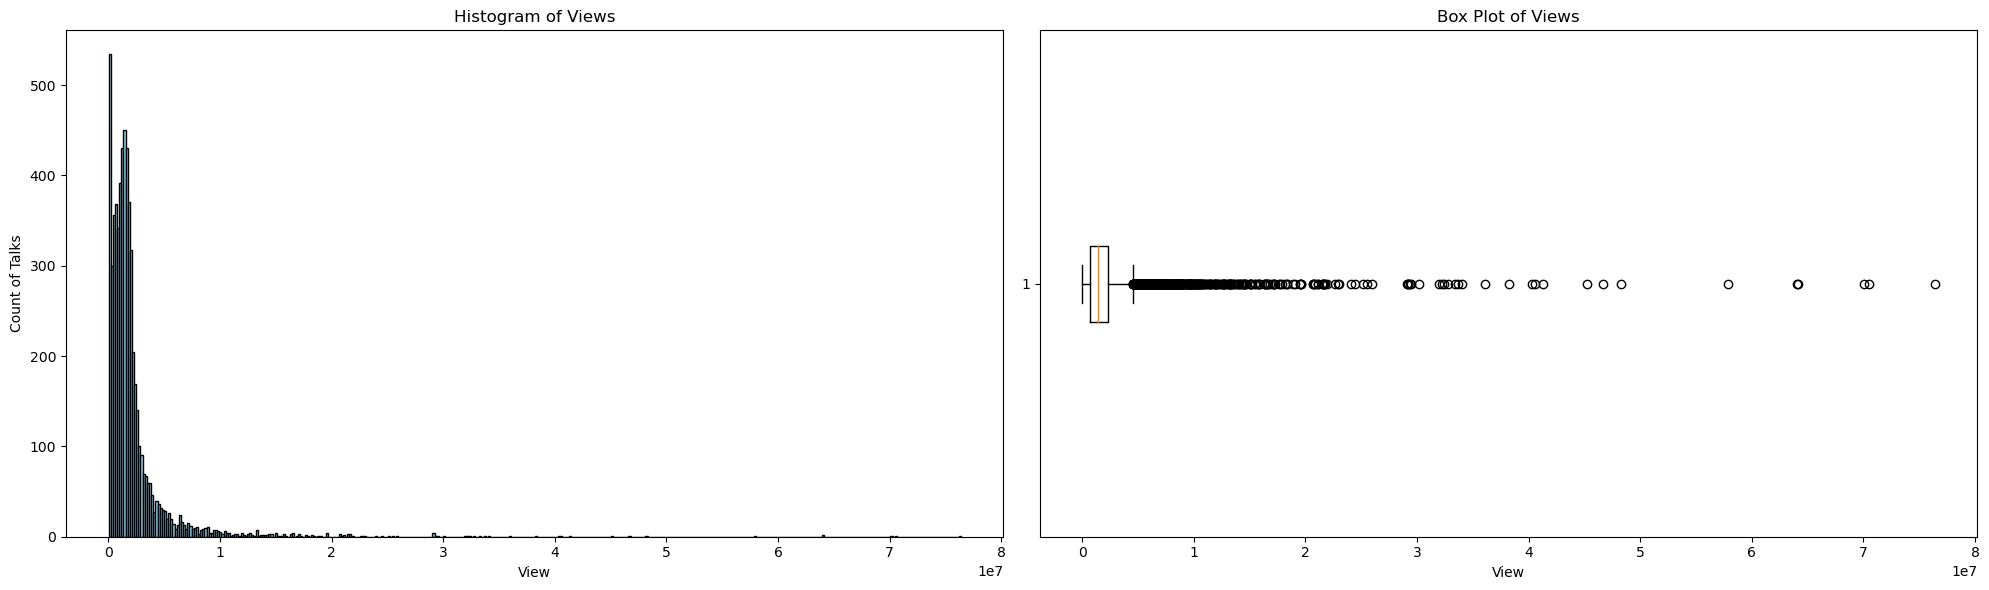

In [8]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Histogram
axes[0].hist(df1['view'], bins=400, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Views')
axes[0].set_xlabel('View')
axes[0].set_ylabel('Count of Talks')

# Box Plot
axes[1].boxplot(df1['view'], vert=False)
axes[1].set_title('Box Plot of Views')
axes[1].set_xlabel('View')

plt.tight_layout()
plt.show()

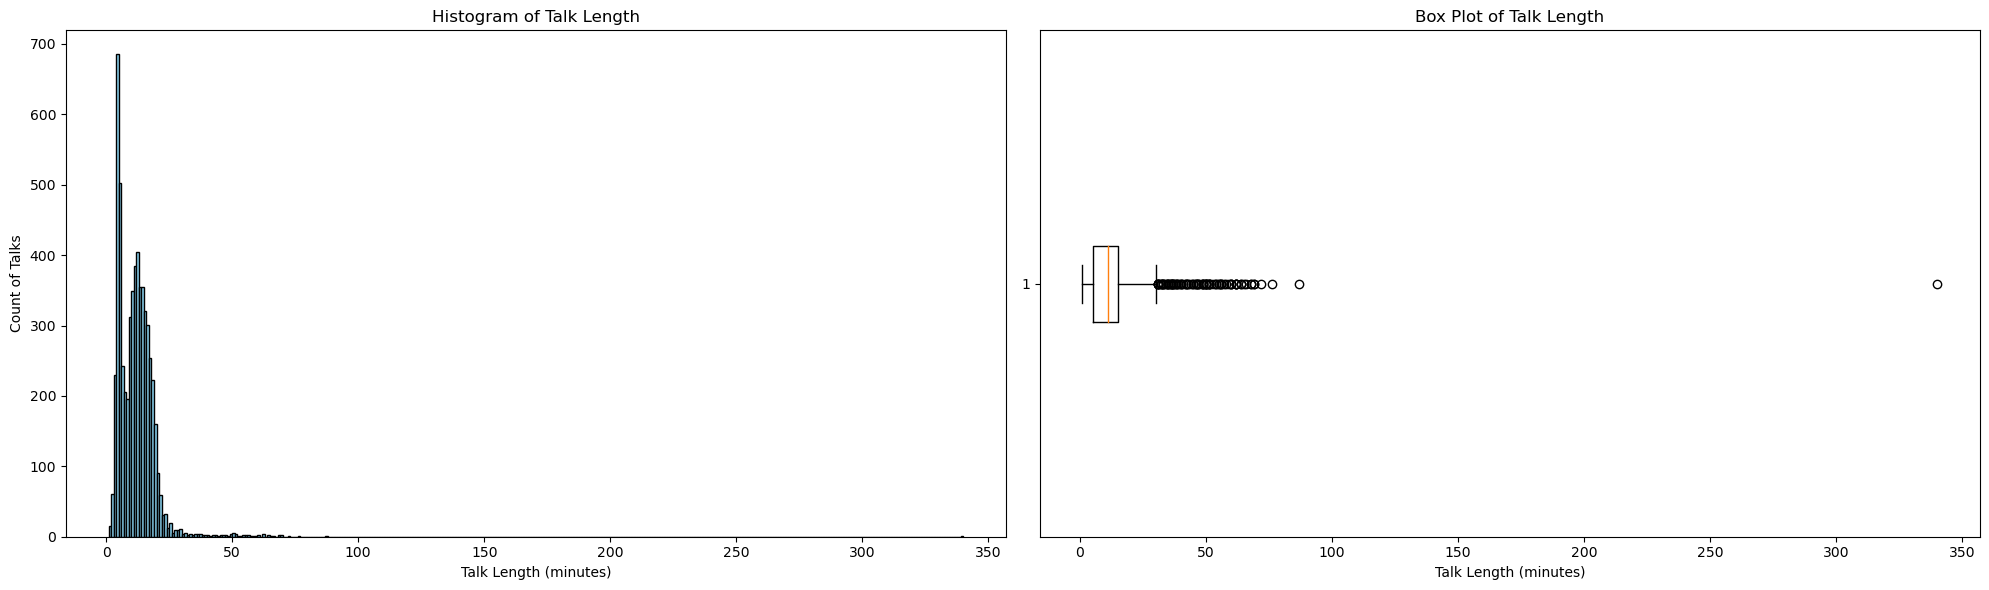

In [9]:
# Calculate the number of bins needed for 1-minute intervals
min_length = df1['duration'].min()
max_length = df1['duration'].max()
bins = int(max_length - min_length)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Histogram
axes[0].hist(df1['duration'], bins=bins, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Talk Length')
axes[0].set_xlabel('Talk Length (minutes)')
axes[0].set_ylabel('Count of Talks')

# Box Plot
axes[1].boxplot(df1['duration'], vert=False)
axes[1].set_title('Box Plot of Talk Length')
axes[1].set_xlabel('Talk Length (minutes)')

plt.tight_layout()
plt.show()

There is a significant outlier, let's delete it.

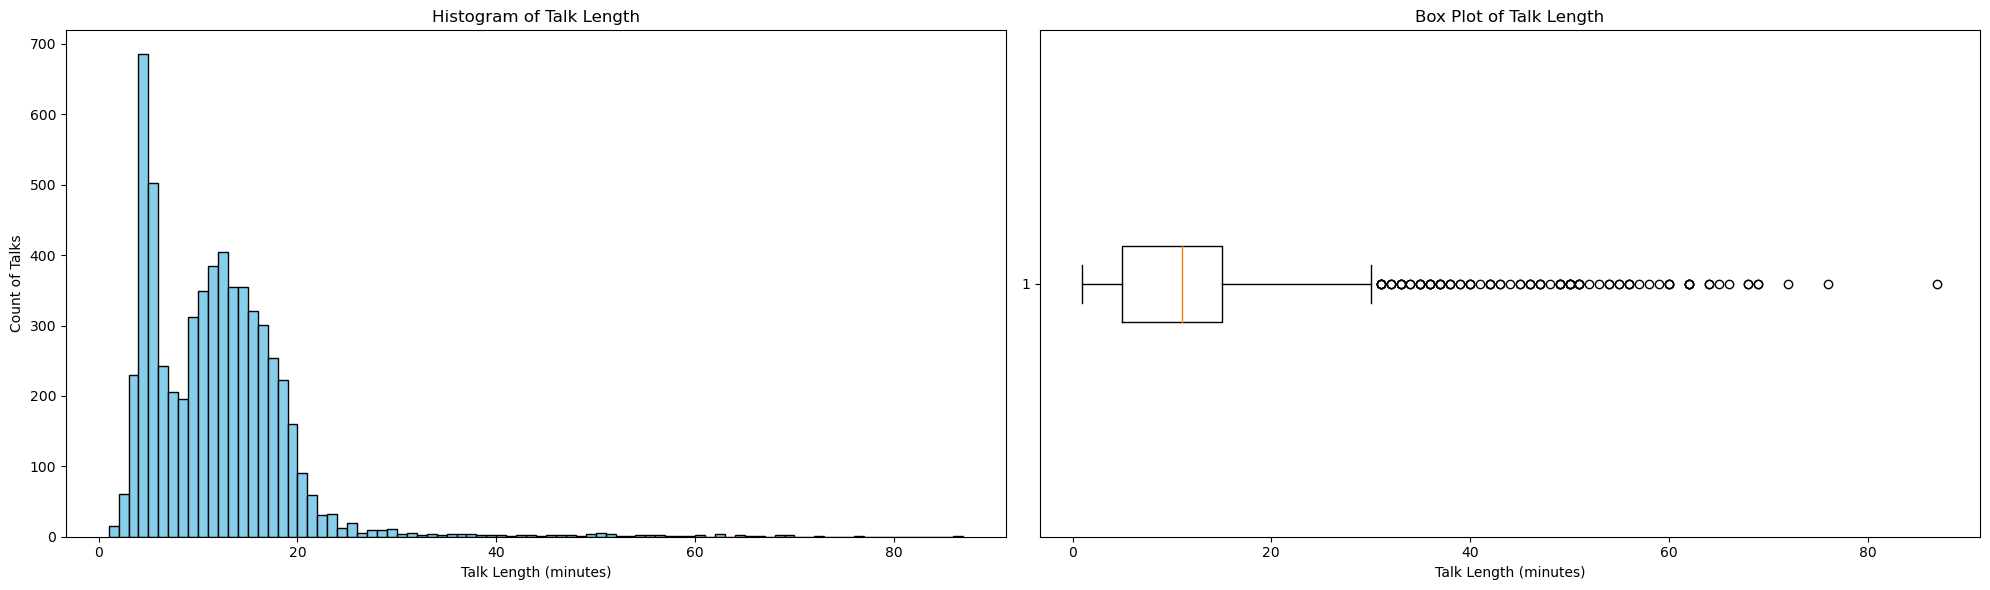

In [10]:
# Delete the talk length outlier
df1 = df1.drop(df1['duration'].idxmax())

# Check the result
# Calculate the number of bins needed for 1-minute intervals
min_length = df1['duration'].min()
max_length = df1['duration'].max()
bins = int(max_length - min_length)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Histogram
axes[0].hist(df1['duration'], bins=bins, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Talk Length')
axes[0].set_xlabel('Talk Length (minutes)')
axes[0].set_ylabel('Count of Talks')

# Box Plot
axes[1].boxplot(df1['duration'], vert=False)
axes[1].set_title('Box Plot of Talk Length')
axes[1].set_xlabel('Talk Length (minutes)')

plt.tight_layout()
plt.show()

### Remove unwanted content and duplicates from 'tag'

In [11]:
tag_counts = Counter()
df1['tag'].str.split(', ').apply(tag_counts.update)

# Printing the tag counts in descending order
for tag, count in tag_counts.most_common():
    print(f"{tag}: {count}")

Privacy Policy: 5929
science: 3679
technology: 3525
TED-Ed: 2512
culture: 2314
animation: 2277
education: 2269
TEDx: 2208
social change: 2155
Read more about TEDx.: 2126
Read more about TED-Ed.: 1960
business: 1906
global issues: 1837
design: 1724
health: 1674
society: 1671
history: 1640
innovation: 1327
humanity: 1314
biology: 1292
art: 1269
communication: 1183
personal growth: 1163
entertainment: 1145
future: 1116
creativity: 1114
climate change: 1099
environment: 1012
community: 1009
brain: 918
sustainability: 904
activism: 899
psychology: 887
medicine: 855
work: 808
nature: 801
performance: 790
health care: 790
economics: 784
animals: 764
music: 750
human body: 749
politics: 740
collaboration: 724
TED Fellows: 709
storytelling: 693
invention: 669
women: 666
kids: 650
engineering: 630
identity: 623
medical research: 584
computers: 569
leadership: 562
equality: 561
government: 550
Internet: 543
public health: 521
Africa: 516
math: 513
war: 508
data: 500
cities: 496
food: 487
space: 4

In [12]:
# List of unwanted strings
unwanted_strings = ['Privacy Policy', 'Read more about TED-Ed.', 'Read more about TEDx.', 'Read more about TED Salons.', 'Become a TED Translator.', 'Countdown Summit']

# Function to remove unwanted strings and duplicates, then join the remaining strings
def remove_unwanted_and_duplicates(text):
    unique_parts = set()
    for part in text.split(','):
        stripped_part = part.strip()
        if stripped_part not in unwanted_strings:
            unique_parts.add(stripped_part)
    return ', '.join(sorted(unique_parts))

# Apply the function to the column
df1.loc[:, 'tag'] = df1['tag'].apply(remove_unwanted_and_duplicates)

df1['tag'].head()

0                    entertainment, music, performance
1    ancient world, astronomy, culture, science, space
2    TED-Ed, animation, architecture, design, educa...
3    climate change, data, environment, science, su...
4     business, entrepreneur, personal growth, success
Name: tag, dtype: object

### Save cleaned data and tag expanded data

In [13]:
# Cleaned data

# List of columns to drop
columns_to_drop = ['length', 'url', 'context', 'description']

# Drop columns from df1
df1.drop(columns=columns_to_drop, inplace=True)

# Export the cleaned DataFrame to a CSV file
df_cleaned = df1[['id', 'view', 'duration', 'year', 'month', 'date', 'speaker', 'title', 'tag']]

df_cleaned.to_csv('cleaned_ted_talks.csv', index=False, encoding='utf-8')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5929 entries, 0 to 6267
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5929 non-null   int64 
 1   view      5929 non-null   int32 
 2   duration  5929 non-null   int32 
 3   year      5929 non-null   int64 
 4   month     5929 non-null   int64 
 5   date      5929 non-null   object
 6   speaker   5929 non-null   object
 7   title     5929 non-null   object
 8   tag       5929 non-null   object
dtypes: int32(2), int64(3), object(4)
memory usage: 416.9+ KB


In [14]:
# Create and export Tag expanded data

df2 = df1

# Splitting the 'tag' column and creating a new row for each tag
df2['tag'] = df2['tag'].str.split(',')  # Split the tags into lists
df_expanded = df2.explode('tag')       # Create new rows for each tag in the list

# Cleaning up the tags (optional, remove leading/trailing spaces)
df_expanded['tag'] = df_expanded['tag'].str.strip()

# Saving the expanded DataFrame to a new CSV file
df_expanded.to_csv('tag_expanded_ted_talks.csv', index=False, encoding='utf-8')

df_expanded.info()
df_expanded.head()

<class 'pandas.core.frame.DataFrame'>
Index: 42336 entries, 0 to 6267
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        42336 non-null  int64 
 1   date      42336 non-null  object
 2   view      42336 non-null  int32 
 3   speaker   42336 non-null  object
 4   title     42336 non-null  object
 5   tag       42336 non-null  object
 6   month     42336 non-null  int64 
 7   year      42336 non-null  int64 
 8   duration  42336 non-null  int32 
dtypes: int32(2), int64(3), object(4)
memory usage: 2.9+ MB


,id,date,view,speaker,title,tag,month,year,duration
0,518806,October 2023,15689,The Merian Ensemble,"""Atalanta""",entertainment,10,2023,6
0,518806,October 2023,15689,The Merian Ensemble,"""Atalanta""",music,10,2023,6
0,518806,October 2023,15689,The Merian Ensemble,"""Atalanta""",performance,10,2023,6
1,519572,April 2019,104401,Kirsten Banks,The aboriginal knowledge stored in the stars,ancient world,4,2019,11
1,519572,April 2019,104401,Kirsten Banks,The aboriginal knowledge stored in the stars,astronomy,4,2019,11


**Table design**

In [15]:
# For efficient future maintenance, the database is structured into three interconnected tables: talks, tags, and talk_tags.

df3 = df_expanded

# Talks Table Data
talks_df = df3[['id', 'year', 'month', 'view', 'title', 'duration', 'speaker']].rename(columns={'id': 'talk_id'})

# Remove duplicates and drop null values
talks_df = talks_df.drop_duplicates().dropna()
# talks_df = talks_df[talks_df['talk_id'] != 480418]

# Tags Table Data
if isinstance(df3['tag'].iloc[0], list):
    unique_tags = set(df3['tag'].explode())
else:
    unique_tags = set(df3['tag'])

tags_df = pd.DataFrame(list(unique_tags), columns=['tag_name']).reset_index()
tags_df = tags_df.rename(columns={'index': 'tag_id'})
tags_df['tag_id'] 
# Remove duplicates and drop null values
tags_df = tags_df[tags_df['tag_name'].notna() & tags_df['tag_name'].ne('')]

# TalkTags Table Data
if isinstance(df3['tag'].iloc[0], list):
    talk_tags = df3.explode('tag')[['id', 'tag']].rename(columns={'id': 'talk_id'}).drop_duplicates()
else:
    talk_tags = df3[['id', 'tag']].rename(columns={'id': 'talk_id'}).drop_duplicates()

# Map tag names to tag_ids
talk_tags['tag_id'] = talk_tags['tag'].map(tags_df.set_index('tag_name')['tag_id'])

# Remove duplicates and drop null values
talk_tags_df = talk_tags[['talk_id', 'tag_id']].drop_duplicates().dropna()



**Create database in MySQL and write data into the database**

In [16]:
from sqlalchemy import create_engine, exc

# Database credentials and info
user = 'root'
password = '123456'
host = 'localhost'
database = 'ted_talks_db'

# Create a connection engine to MySQL Server (without specific database)
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}')

# Check if database exists and create if it doesn't
try:
    # Drop the database if it exists
    engine.execute(f"DROP DATABASE IF EXISTS {database}")
    
    # Create the new database
    engine.execute(f"CREATE DATABASE {database}")  
    
    # Select the new database
    engine.execute(f"USE {database}")  
except exc.SQLAlchemyError as e:
    print(f"Error occurred: {e}")

# Update engine to use the new database
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

# Write data into the database
talks_df.to_sql('Talks', con=engine, if_exists='append', index=False)
tags_df.to_sql('Tags', con=engine, if_exists='append', index=False)
talk_tags_df.to_sql('TalkTags', con=engine, if_exists='append', index=False)


C:\Users\78627\AppData\Local\Temp\ipykernel_16508\4178840447.py:29: UserWarning: The provided table name 'Talks' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  talks_df.to_sql('Talks', con=engine, if_exists='append', index=False)
C:\Users\78627\AppData\Local\Temp\ipykernel_16508\4178840447.py:30: UserWarning: The provided table name 'Tags' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  tags_df.to_sql('Tags', con=engine, if_exists='append', index=False)
C:\Users\78627\AppData\Local\Temp\ipykernel_16508\4178840447.py:31: UserWarning: The provided table name 'TalkTags' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  talk_tags_df.to_sql('TalkTags', con=engine, if_exists='append', i

42327

**Export to csv if needed**

In [17]:
# Export to csv
talks_df.to_csv('talk.csv', index=False, encoding='utf-8')
tags_df.to_csv('tag.csv', index=False, encoding='utf-8')
talk_tags_df.to_csv('talk_and_tag.csv', index=False, encoding='utf-8')

## Step 2: Exploratory Data Analysis (EDA)
**Objective**: Uncover patterns, spot anomalies, and formulate hypotheses.

**Analysis the data to answer the following questions**
- What is the frequency of TED Talks changed over the years?
- How has the monthly popularity of TED Talks evolved year by year?
- What are the most viewed TED Talks and common tags among them?
- Who are the most popular TED Talk speakers and what are common tags among them?
- What are the most frequent words in title?

### 2.1 What is the frequency of TED Talks changed over the years?

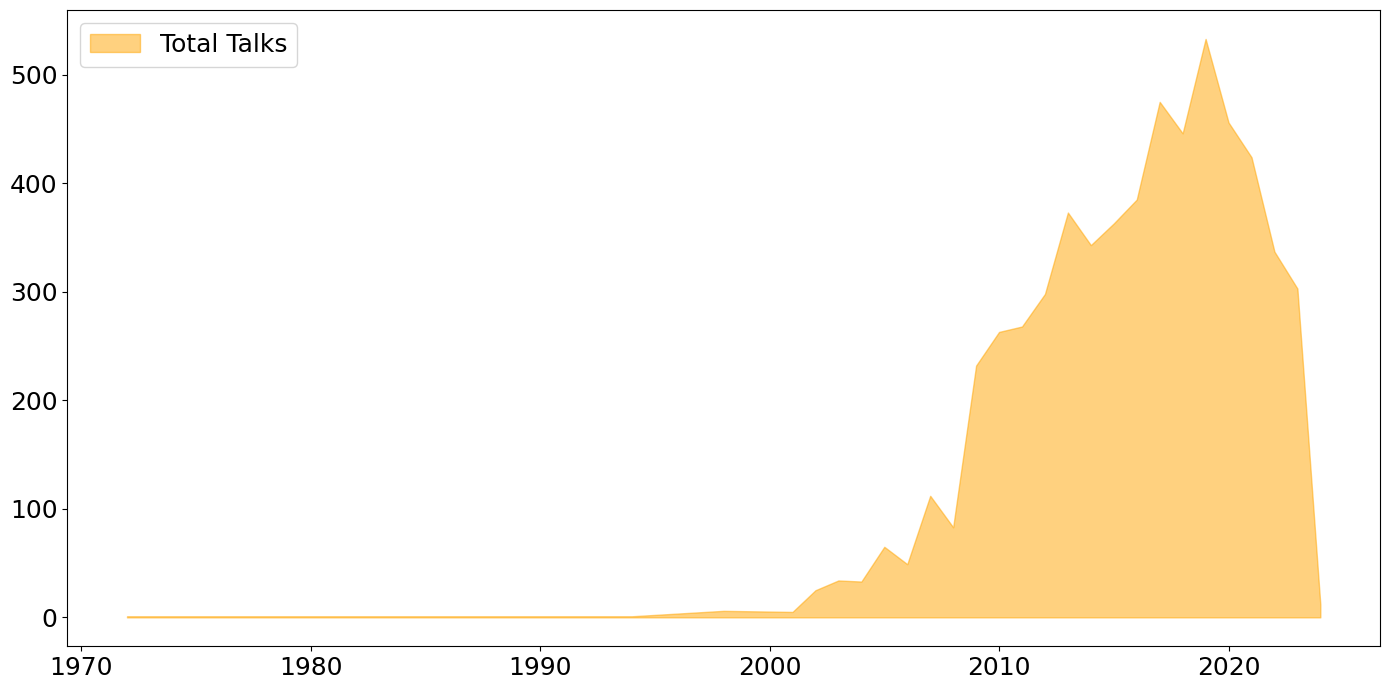

In [46]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(14, 7))
talks_per_year = df_cleaned.groupby('year').size()
ax1.fill_between(talks_per_year.index, talks_per_year, color='orange', alpha=0.5, label='Total Talks')
# ax1.set_ylabel('Total Talks', fontsize=18)
ax1.tick_params(axis='both', labelsize=18) 

# Show legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper left', fontsize=18)

plt.tight_layout()
plt.show()

**Observation**

The frequency of TED Talks have experienced **significant growth since the mid-2000s**, with a peak and subsequent decline in the late 2010s. The graph suggests a period of rapid expansion followed by a recent downturn in both the production of talks.

### 2.2 How has the monthly popularity of TED Talks evolved year by year?

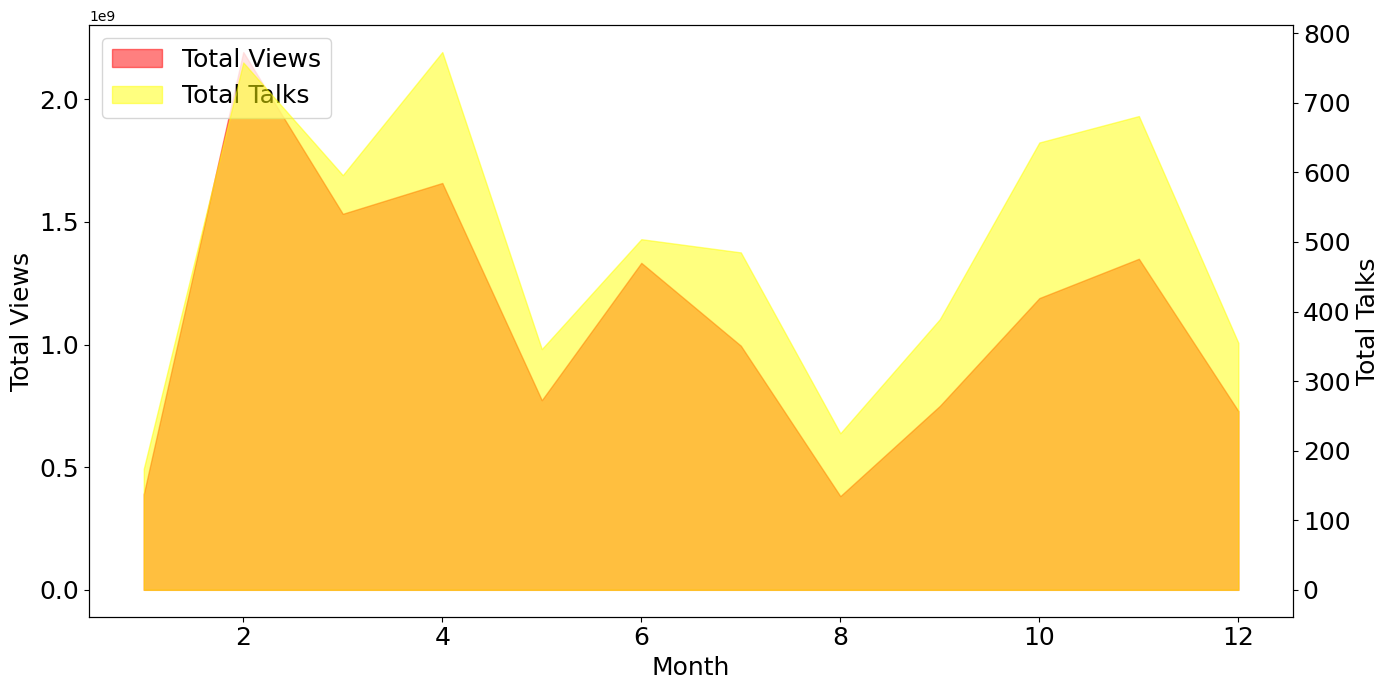

In [38]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot total views by month with an area plot
views_per_month = df_cleaned.groupby('month')['view'].sum()
ax1.fill_between(views_per_month.index, views_per_month, color='red', alpha=0.5, label='Total Views')
ax1.set_xlabel('Month', fontsize=18)
ax1.set_ylabel('Total Views', fontsize=18)

# Increase the font size of the tick labels for ax1
ax1.tick_params(axis='both', labelsize=18)  # Adjust 'labelsize' as needed

# Create another y-axis for total talks by month with an area plot
talks_per_month = df_cleaned.groupby('month').size()
ax2 = ax1.twinx()
ax2.fill_between(talks_per_month.index, talks_per_month, color='yellow', alpha=0.5, label='Total Talks')
ax2.set_ylabel('Total Talks', fontsize=18)

# Increase the font size of the tick labels for ax2
ax2.tick_params(axis='both', labelsize=18)  # Adjust 'labelsize' as needed

# Show legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=18)

plt.tight_layout()
plt.show()


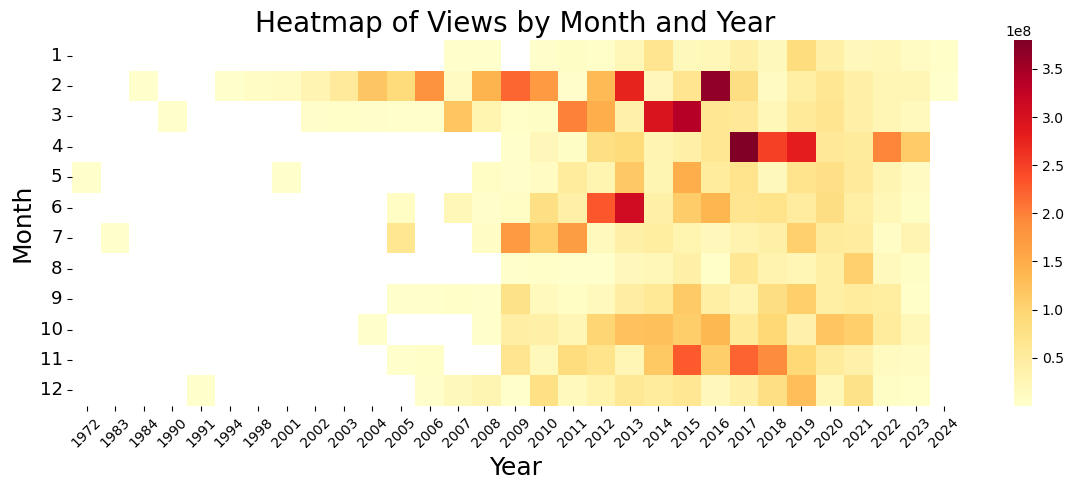

In [56]:
# Pivot the DataFrame to have months as rows, years as columns, and views as values
pivot_df = df_cleaned.pivot_table(index='month', columns='year', values='view', aggfunc='sum')

# Set the color palette to a similar one used in the example images
cmap = sns.color_palette("YlOrRd", as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(pivot_df, cmap=cmap, annot=False)  # Use the YlOrRd color palette
plt.title('Heatmap of Views by Month and Year', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Month', fontsize=18)
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(rotation=0, fontsize=13) 
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()


**Observation**

- The line chart indicates in **February, April, and November**, these months might host more talks and had more total views. The heatmap supports this with darker shades in these specific months, implying higher engagement levels. 
- Over the years, a gradual intensification of color hints at an increasing audience base, with recent years showing a marked rise in views. It's assumed that this growth corresponds to both the growing number of talks and the expanding reach of digital platforms.

### 2.3 What are the most viewed TED Talks and common tags among them?

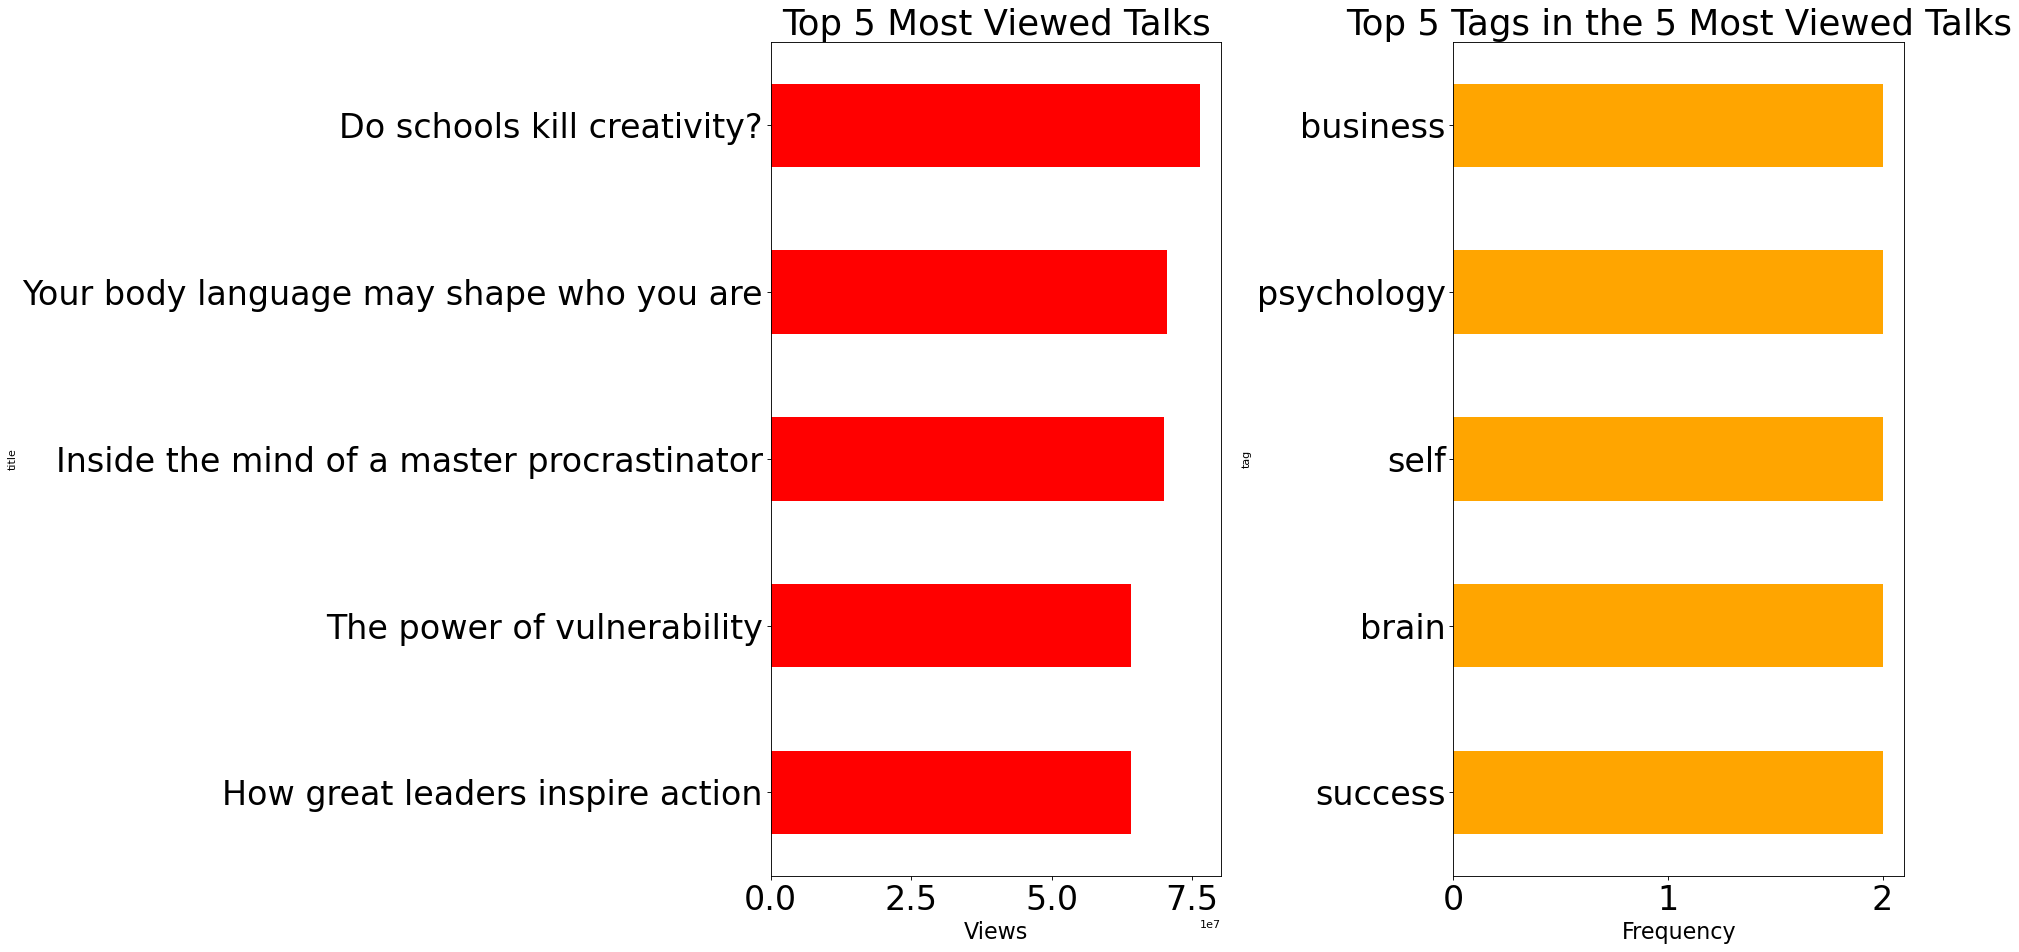

In [61]:
# Step 1: Extract Tags for Top Talks
top_talks = df_cleaned.groupby('title')['view'].sum().sort_values(ascending=False).head(5)
top_titles = top_talks.index.tolist()

# Step 2: Prepare Data for Plotting
# Filter for top_titles and explode the tags into separate rows
top_tags = df_expanded[df_expanded['title'].isin(top_titles)].copy()
top_tags['tag'] = top_tags['tag'].str.split(',')  
tags_expanded = top_tags.explode('tag')
tags_count = tags_expanded['tag'].value_counts().sort_values(ascending=False).head(5)  # Counting tags

# Step 3: Create a Dual Plot
fig, axes = plt.subplots(1, 2, figsize=(24, 12), dpi=80)

# Plot for views
top_talks.sort_values().plot(kind='barh', color='red', ax=axes[0], fontsize=20)
axes[0].set_title('Top 5 Most Viewed Talks', fontsize=32)
axes[0].set_xlabel('Views', fontsize=20)
# axes[0].set_ylabel('Talks', fontsize=20)
axes[0].tick_params(axis='both', labelsize=30)  

# Plot for tags - using tags_count
tags_count.plot(kind='barh', color='orange', ax=axes[1], fontsize=20)
axes[1].set_title('Top 5 Tags in the 5 Most Viewed Talks', fontsize=32)
axes[1].set_xlabel('Frequency', fontsize=20)
axes[1].tick_params(axis='both', labelsize=30)  

# Set tight layout
plt.tight_layout()

# Show the plots
plt.show()

**Observation**

Based on the provided image, the most viewed TED Talks are:

1. "Do schools kill creativity?"
2. "Your body language may shape who you are"
3. "Inside the mind of a master procrastinator"
4. "The power of vulnerability"
5. "How great leaders inspire action"

The common tags among these highly viewed talks are:

1. "business"
2. "psychology"
3. "self"
4. "brain"
5. "success"

These tags suggest that topics related to personal development, leadership, and psychological insights have a strong appeal to the TED Talks viewership.

### 2.4 Who are the most popular TED Talk speakers and what are common tags among them?

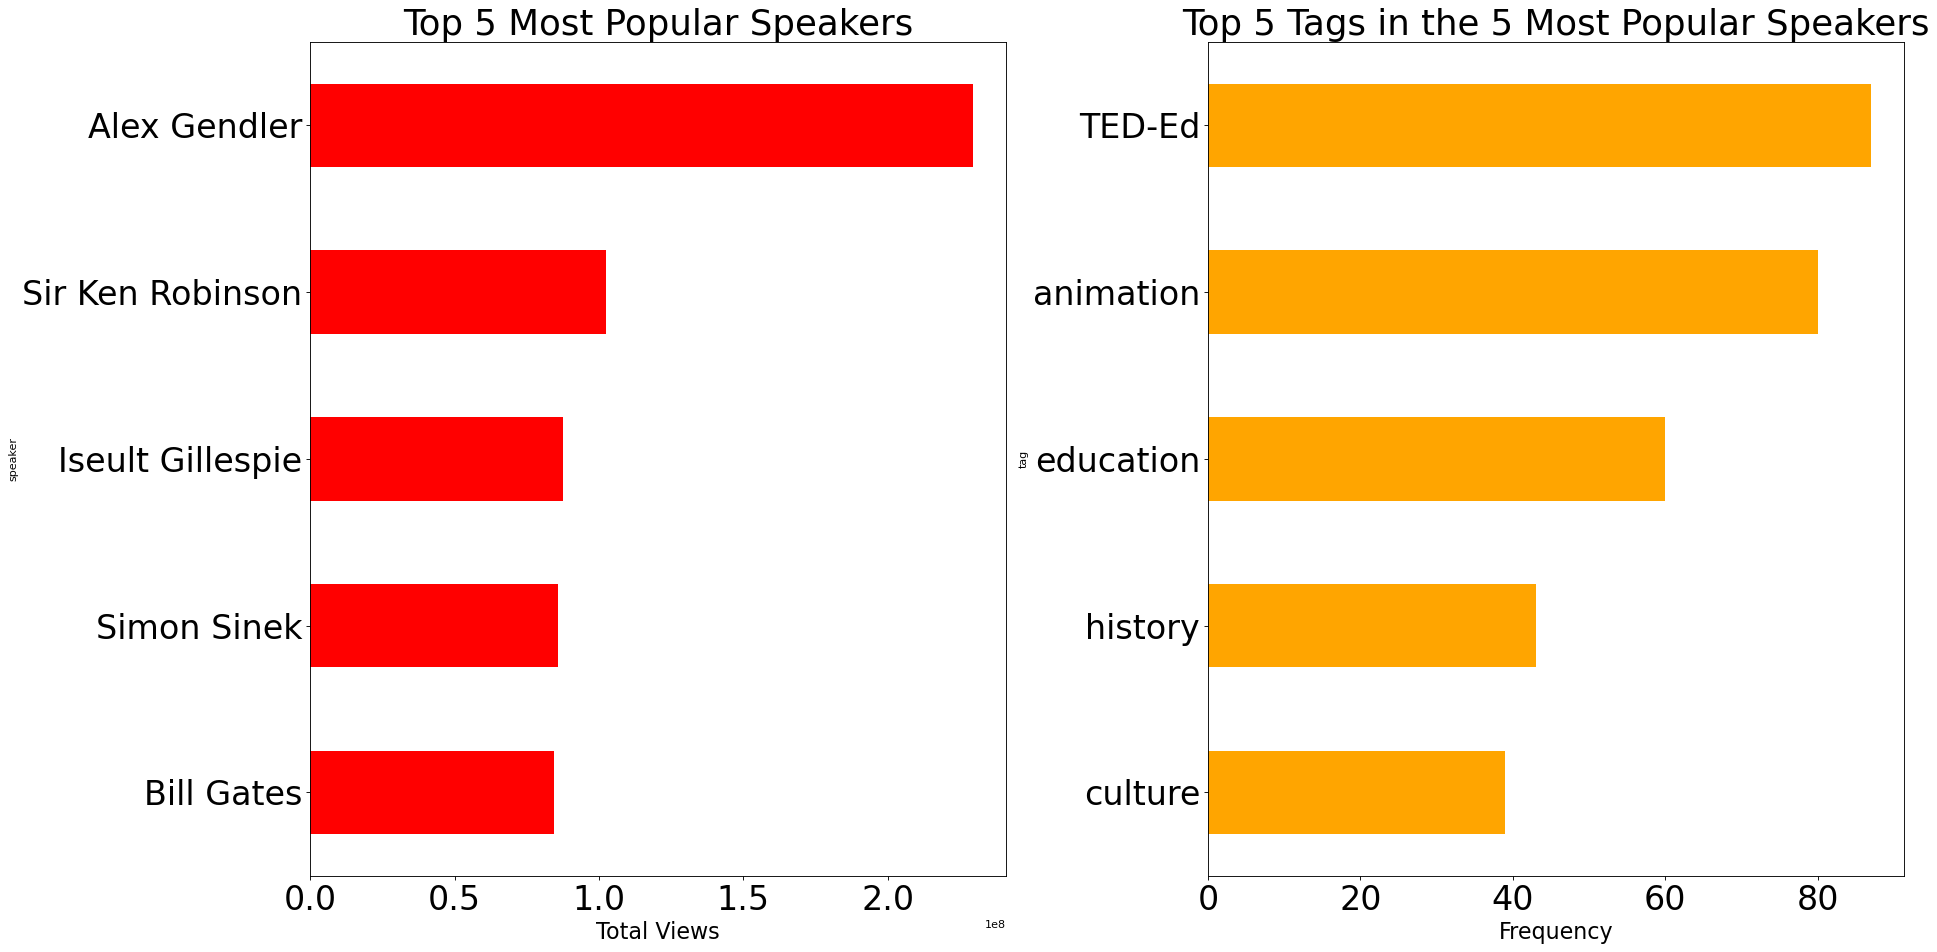

In [64]:
# Step 1: Extract Tags for Top Talks
top_talks = df_cleaned.groupby('speaker')['view'].sum().sort_values(ascending=False).head(5)
top_speakers = top_talks.index.tolist()

# Step 2: Prepare Data for Plotting
# Correctly filter for top_speakers and explode the tags into separate rows
top_tags = df_expanded[df_expanded['speaker'].isin(top_speakers)].copy()
top_tags['tag'] = top_tags['tag'].str.split(',')
tags_expanded = top_tags.explode('tag')
tags_count = tags_expanded['tag'].value_counts().head(5)

# Step 3: Create a Dual Plot
fig, axes = plt.subplots(1, 2, figsize=(24, 12), dpi=80)

# Plot for views
top_talks.sort_values().plot(kind='barh', color='red', ax=axes[0], fontsize=20)
axes[0].set_title('Top 5 Most Popular Speakers', fontsize=32)
axes[0].set_xlabel('Total Views', fontsize=20)
# axes[0].set_ylabel('Speakers', fontsize=20)
axes[0].tick_params(axis='both', labelsize=30)

# Plot for tags - using tags_count
if not tags_count.empty:
    tags_count.sort_values().plot(kind='barh', color='orange', ax=axes[1], fontsize=20)
    axes[1].set_title('Top 5 Tags in the 5 Most Popular Speakers', fontsize=32)
    axes[1].set_xlabel('Frequency', fontsize=20)
    axes[1].tick_params(axis='both', labelsize=30)
else:
    print("No data available for tag plot")

# Set tight layout and show the plots
plt.tight_layout()
plt.show()


**Observation**

Based on the provided image, the most popular TED Talk speakers are:

1. Alex Gendler
2. Sir Ken Robinson
3. Iseult Gillespie
4. Simon Sinek
5. Bill Gates

The common tags associated with talks given by these popular speakers are:

1. TED-Ed
2. Animation
3. Education
4. History
5. Culture

These tags suggest that educational content, particularly animated explanations of historical and cultural topics, as well as educational talks, are frequently featured in the presentations by these renowned speakers.

### 2.5 What are the most frequent words in title?

[nltk_data] Error loading punkt: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


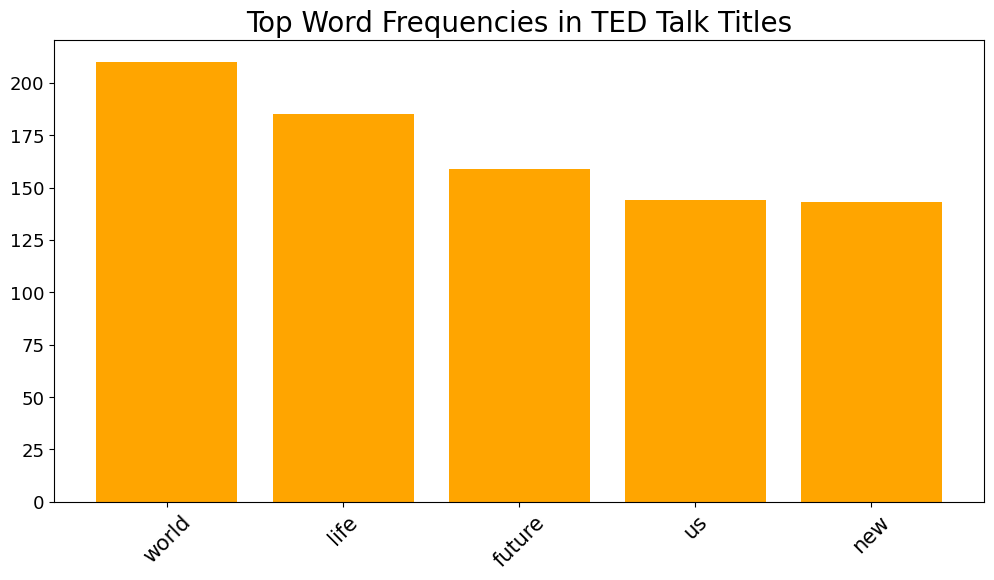

In [70]:
# Let's proceed with the provided code to print the word frequency with a bar chart.
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Ensure that the necessary NLTK packages are downloaded and available.
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenize titles and filter out stop words
all_words = []
for title in df_cleaned['title']:
    words = nltk.word_tokenize(title.lower())  # Convert to lowercase for consistency
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Filter out stop words and non-alphanumeric characters
    all_words.extend(words)

# Count word frequency
word_counts = Counter(all_words)

# Plot word frequency
# Limiting to the top words for better readability on the bar chart
top_words = word_counts.most_common(5)
words = [word[0] for word in top_words]
frequencies = [word[1] for word in top_words]

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='orange')
plt.title('Top Word Frequencies in TED Talk Titles', fontsize=20)
# plt.xlabel('Words')
# plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=15)  
plt.yticks(rotation=0, fontsize=13) 
plt.show()


**Observation**

The 5 most frequent words in title excluding common stop words are 'world', 'life', 'future', 'us' and 'new'. It suggest that TED Talks commonly address themes of global significance, future possibilities, environmental concerns, personal and collective growth, and societal or professional advancements.

## Step 3: Conclusion

In conclusion, the landscape of TED Talks has seen a remarkable journey of growth and evolution. Over the years, there has been a significant rise in the frequency of talks, peaking in the late 2010s before experiencing a slight decline. The monthly popularity reveals a distinct pattern of heightened engagement during February, April, and November. The most viewed talks, which grapple with themes of creativity, self-development, and leadership, share common tags that resonate deeply with audiences, including 'business', 'psychology', and 'success'. These insights are mirrored in the topics delivered by the most celebrated speakers of the platform, such as Alex Gendler and Sir Ken Robinson, whose content often revolves around education, history, and culture. Additionally, the frequent occurrence of words like 'world', 'life', and 'future' in talk titles underscores TED's commitment to addressing globally relevant and forward-looking topics. This collective data paints a picture of a platform that thrives on intellectual curiosity and the pursuit of knowledge, catering to an audience that is continuously eager to explore new ideas and perspectives.